In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.optim import Adam
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
import numpy as np

from config_mnist import device, BATCH_SIZE, EPOCHS, latent_dim
import vae_mnist as vae_mnist

Load the model and save latent reps

In [ ]:
loaded_model = vae_mnist.VariationalAutoencoder(latent_dim).to(device)  # Ensure the architecture matches the saved model
loaded_model.load_state_dict(torch.load("pth/vae_model_ldim_2.pth"))
loaded_model.eval()  # Set the model to evaluation mode
trained_model = loaded_model

In [ ]:
# Load MNIST dataset
mnist = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
loader = torch.utils.data.DataLoader(mnist, batch_size=1000, shuffle=False)

# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trained_model.eval()

# Dictionary to store latent representations for each digit class
latent_representations = {i: [] for i in range(10)}

with torch.no_grad():
    for data, labels in loader:
        data = data.to(device)
        labels = labels.numpy()

        # Encode to get latent variables
        mu, _ = trained_model.encode(data)
        mu = mu.cpu().numpy()

        # Store latent values per class
        for i in range(10):
            latent_representations[i].append(mu[labels == i])

# Convert lists to numpy arrays
for key in latent_representations:
    latent_representations[key] = np.concatenate(latent_representations[key], axis=0)

# Save each class separately
for digit, latents in latent_representations.items():
    np.save(f"npy/22/latent_digit_{digit}.npy", latents)

print("Latent representations saved for each class.")


Load latent reps

In [ ]:
# Define file paths and corresponding labels
file_paths = [
    "npy/2/latent_digit_0.npy",
    "npy/2/latent_digit_1.npy",
    "npy/2/latent_digit_2.npy",
    "npy/2/latent_digit_3.npy",
    "npy/2/latent_digit_4.npy",
    "npy/2/latent_digit_5.npy",
    "npy/2/latent_digit_6.npy",
    "npy/2/latent_digit_7.npy",
    "npy/2/latent_digit_8.npy",
    "npy/2/latent_digit_9.npy",
]

# Define colors for each class
colors = plt.cm.get_cmap("tab10", 10)


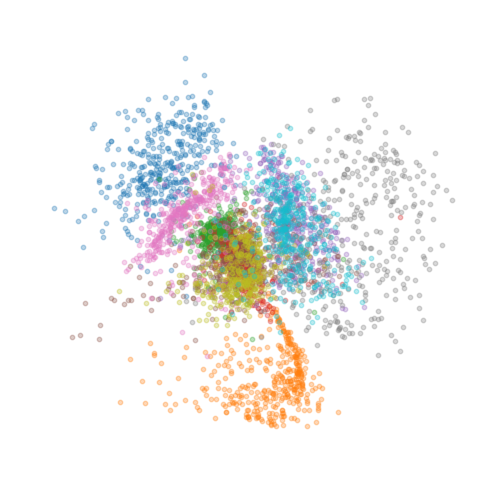

In [16]:
# Adjust the plot range to [-4.5, 4.5] in both axes
plt.figure(figsize=(6, 6))

for i, file_path in enumerate(file_paths):
    data = np.load(file_path)  # Load latent space data
    plt.scatter(data[:400, 0], data[:400, 1], s=10, color=colors(i), alpha=0.3)

# Set limits to [-4.5, 4.5] for both axes
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)

# Remove axis labels, ticks, grid, and title
plt.xticks([])
plt.yticks([])
plt.box(False)

# Save the updated plot
updated_plot_path = "latent_space_plot_updated.png"
plt.savefig(updated_plot_path, bbox_inches='tight', pad_inches=0, dpi=1000)
plt.show()

# Return the file path
#updated_plot_path


Save as json

In [18]:
import numpy as np
import json

data_dict = {}

for digit in range(10):
    # Load the .npy array
    arr = np.load(f"npy/2/latent_digit_{digit}.npy")  # shape: (N, 2), for example
    # Keep only first 500 points
    arr_500 = arr[:500]
    # Convert numpy array -> Python lists
    data_dict[str(digit)] = arr_500.tolist()

# Write to JSON
with open("latent_points_2.json", "w") as f:
    json.dump(data_dict, f)
